**Import Library**

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Import Dataset**

In [3]:
df = pd.read_csv('All (2).csv')
df1 = df[['latitude','longitude','depth']]
df1.head()

,latitude,longitude,depth
0,-7.5410,127.7190,128.39
1,0.0035,97.3691,26.63
2,-5.9984,133.8029,10.00
3,1.6856,127.2472,123.64
4,-9.3760,126.3634,35.00


**Mengubah kedalaman kebentuk binnary**
*Dimana kedalaman lebih dari 70 Km == 1 dan selebihnya == 0* 

In [7]:
def depth_bin (row):
    if row['depth'] < 70 :
      return 0
    if row['depth'] > 70 :
      return 1

In [12]:
#df1['target']=pd.Series(np.where(df1.values == 'y', 1, 0),df1.index)
df1['Target'] = df1.apply(depth_bin, axis=1)
df1['Target'] = df1['Target'].astype(int)
df1.head()

C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,latitude,longitude,depth,target,Target
0,-7.5410,127.7190,128.39,0,1
1,0.0035,97.3691,26.63,0,0
2,-5.9984,133.8029,10.00,0,0
3,1.6856,127.2472,123.64,0,1
4,-9.3760,126.3634,35.00,0,0


**Menentukan Lokasi Gempa Dalam**

In [13]:
sns.set()
dalam = df1[df1['Target']=='1']
x = df1['longitude']
y = df1['latitude']
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\pandas\core\ops.py:798: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

**Menentukan Lokasi Gempa Dangkal**

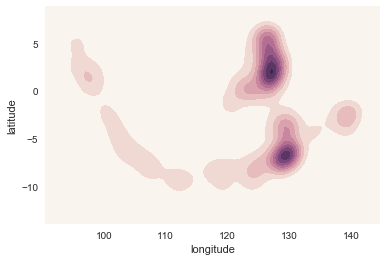

In [6]:
sns.set()
dalam = df1[df1['target']=='0']
x = df1['longitude']
y = df1['latitude']
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True);

**Membagi data train dan data test**

In [7]:
from sklearn.cross_validation import train_test_split

C:\Users\Hadyan Pratama\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
X = df1.iloc[:, [0, 1]].values
y = df1.iloc[:, 3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Menentukan SVC**

In [62]:
from sklearn.svm import SVC

In [63]:
model = SVC()

In [64]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Melakukan Test**

In [65]:
predictions = model.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[924 132]
 [116 587]]


             precision    recall  f1-score   support

          0       0.89      0.88      0.88      1056
          1       0.82      0.83      0.83       703

avg / total       0.86      0.86      0.86      1759



**Menetukan GridSearch**

In [70]:
from sklearn.grid_search import GridSearchCV

In [71]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [72]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.855994 -   0.6s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.869152 -   0.5s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.865399 -   0.5s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.817982 -   0.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.823830 -   0.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.809802 -   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.758772 -   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.746345 -   0.3s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.742502 -   0.3s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [74]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [75]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Melakukan Prediksi dari Nilai Optimum**

In [76]:
grid_predictions = grid.predict(X_test)

In [77]:
print (confusion_matrix(y_test,grid_predictions))

[[927 129]
 [ 74 629]]


In [79]:
print (classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.93      0.88      0.90      1056
          1       0.83      0.89      0.86       703

avg / total       0.89      0.88      0.89      1759



In [80]:
from sklearn.pipeline import Pipeline 

In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV 

In [82]:
from sklearn import svm

In [83]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=10, gamma=0.0001))]) 

In [84]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [85]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [86]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   40.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [87]:
svm_grid_rbf.best_score_

0.87082622471362414

In [88]:
best = svm_grid_rbf.best_estimator_.get_params() 

In [89]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 5.00
	clf__gamma: 	 1.00


In [90]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [91]:
confusion_matrix(y_test, y_test_pred)

array([[933, 123],
       [ 77, 626]], dtype=int64)

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 0.8886
Recall Score: 		 0.8863
F1 Score: 		 0.8868


In [93]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#plate size
w = h = 10.
#intervals in x-, y-, directions, mm
dx = dy = 0.1
#Thermal diffusivity of steel, mm2.s-1
D = 2000

Tcool, Thot = 0, 100

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2*dy2/(2*D*(dx2+dy2))

u0 = np.ones((nx,ny))
u = np.empty((nx,ny))

#Initial conditions - ring of inner radius r, width dr centred at 
r, cx, cy = 4, 5, 5
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2+(j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = Thot

def do_timestep(u0,u):
    #propagate with forward-difference in time, central-difference
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
            (u0[2:, 1:-1]- 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
            + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1,:-2])/dy2)
    
    u0 = u.copy()
    return u0, u

#Number of timestep
x = np.linspace(0,dx,nx)
y = np.linspace(0,dy,ny)
XX, YY = np.meshgrid(x, y)

v = np.linspace(Tcool, Thot, 100, endpoint=True)
plt.ion()
plt.rcParams['image.cmap'] = 'jet'
fig, ax = plt.subplots()
for t in range(1000):
    u0, u = do_timestep(u0, u)
    CF = ax.contourf(XX, YY, u, levels=v)
    ax.set_xlabel ('Distance (km)')
    ax.set_ylabel ('Distance (km)')
    ax.set_aspect ('equal')
    fig.canvas.draw()